In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

from pathlib import Path
from tqdm import tqdm
import cv2
import os


In [2]:
def simple_im_show(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


In [3]:
base_path = Path(os.path.abspath(os.path.join("data", "INbreast Release 1.0")))
csvs_path = base_path
png_folder = base_path/'AllPNGs'
masks_folder = base_path/'AllMasks'
dcm_folder = base_path/'AllDICOMs'
xml_folder = base_path/'AllXML'


In [4]:
image_filanme = "20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
image_metadata = {'img_id': image_filanme.split('_')[0],
                  'case_id': image_filanme.split('_')[1],
                  'side': image_filanme.split('_')[3],
                  'view': image_filanme.split('_')[4]}
dcm_filename = dcm_folder/image_filanme


In [5]:
roi_df = pd.read_csv(csvs_path/"rois_metadata.csv", index_col=0).set_index("case_id")
patient_rois = roi_df.loc[image_metadata['case_id']]
image_mC_rois = patient_rois [(patient_rois['type']==19)&(patient_rois['img_id']==int(image_metadata['img_id']))]
image_mC_rois.head()
image_mC_rois.columns
# roi_df

Index(['img_id', 'side', 'view', 'area', 'center', 'center_crop', 'dev',
       'index_in_image', 'max', 'mean', 'min', 'number_of_points', 'point_mm',
       'point_px', 'point_px_crop', 'total', 'type', 'lesion_bbox',
       'lesion_bbox_crop', 'stored', 'acr', 'birads', 'type_excel',
       'finding_notes', 'lesion_annot', 'pectoral_muscle', 'artifact',
       'lesion_type'],
      dtype='object')

In [6]:
roi_df[['img_id', 'side', 'view', 'area',  'index_in_image', 'number_of_points', 'total', 'type','lesion_type', 'stored']].head(50)

,img_id,side,view,area,index_in_image,number_of_points,total,type,lesion_type,stored
case_id,,,,,,,,,,
6c613a14b80a8591,20586908,R,CC,0.000000,1,1,1358.0,19,Calcification,False
6c613a14b80a8591,20586908,R,CC,0.000000,2,1,1401.0,19,Calcification,False
6c613a14b80a8591,20586908,R,CC,0.000000,3,1,1299.0,19,Calcification,True
6c613a14b80a8591,20586908,R,CC,0.000000,4,1,1765.0,19,Calcification,True
6c613a14b80a8591,20586908,R,CC,0.002230,5,9,96568.0,15,Calcification,True
6c613a14b80a8591,20586908,R,CC,0.000000,6,1,1827.0,19,Calcification,True
6c613a14b80a8591,20586908,R,CC,0.000000,7,1,1570.0,19,Calcification,True
6c613a14b80a8591,20586908,R,CC,0.000000,8,1,1802.0,19,Calcification,True
6c613a14b80a8591,20586908,R,CC,0.000000,9,1,1907.0,19,Calcification,True


In [7]:
patient_rois['index_in_image'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int64)

In [8]:
patient_rois['type'].values

array([19, 19, 19, 19, 15, 19, 19, 19, 19, 19, 19, 19, 15, 19, 15, 19, 19,
       15, 19, 19, 19, 19, 19, 19, 15, 19, 19, 15, 19, 19, 19, 19, 19, 19,
       19, 15, 15, 19, 15, 15, 15, 19, 15, 19, 19, 19, 19, 19, 19, 19, 19,
       15, 15, 15, 19, 19, 19, 19, 19, 19, 19, 19, 15, 15, 19, 15, 19,  9,
       15, 15, 19, 19, 19, 19, 19, 15, 15, 19, 15, 15, 15, 19, 19, 15, 15,
       15, 15, 19, 19, 19, 19, 19, 19, 15, 19, 15, 19, 19, 19, 19, 19, 15,
       19, 15, 19, 19, 15, 15, 15, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 15, 15, 19, 19, 19, 19, 15, 15, 19, 15, 15, 15, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 15, 15, 19, 19, 19, 19, 19, 19,
        9, 19, 19, 19, 19, 19, 19, 19, 19, 19, 15, 19], dtype=int64)

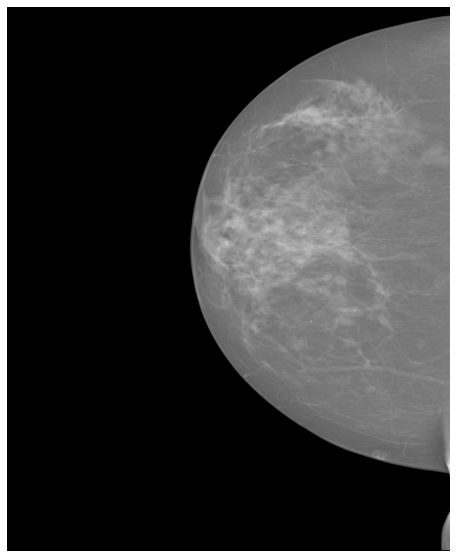

In [9]:
im = sitk.ReadImage(str(dcm_filename))
im_array = sitk.GetArrayFromImage(im)
im_array = im_array[0, :, :]
simple_im_show(im_array)


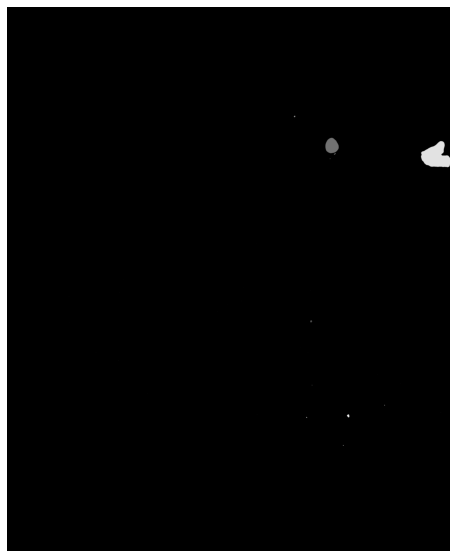

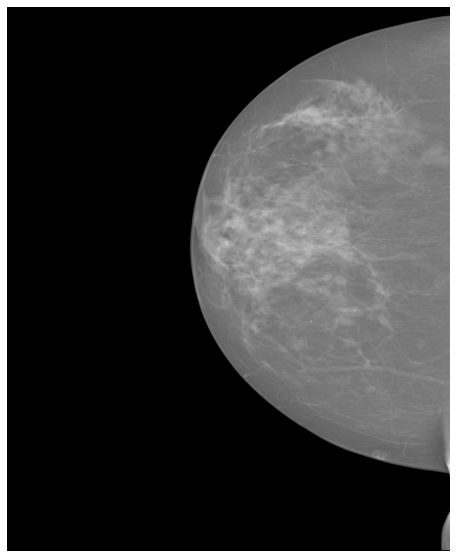

In [10]:
mask = cv2.imread(str(masks_folder/f'{image_metadata["img_id"]}_lesion_mask.png'), cv2.IMREAD_GRAYSCALE)
png = cv2.imread(str(png_folder/f'{image_metadata["img_id"]}.png'), cv2.IMREAD_ANYDEPTH)

simple_im_show(mask)
simple_im_show(png)

In [11]:
png.shape

(4084, 3328)

In [17]:
from skimage.util.shape import view_as_windows
from skimage.util import montage

def slice_image(image:np.ndarray, window_size:tuple, stride:int):
    img_pathces = view_as_windows(png, window_size, stride)
    return img_pathces.reshape((img_pathces.shape[0] * img_pathces.shape[1], img_pathces.shape[2], img_pathces.shape[2]))

In [13]:
x = 16
window_size = (x, x)
stride = x

mask_slices = slice_image(mask, window_size, stride)
png_slices = slice_image(png, window_size, stride)

In [14]:
png_slices.shape

(53040, 16, 16)

In [15]:
view_as_windows(png, window_size, stride).shape

(255, 208, 16, 16)

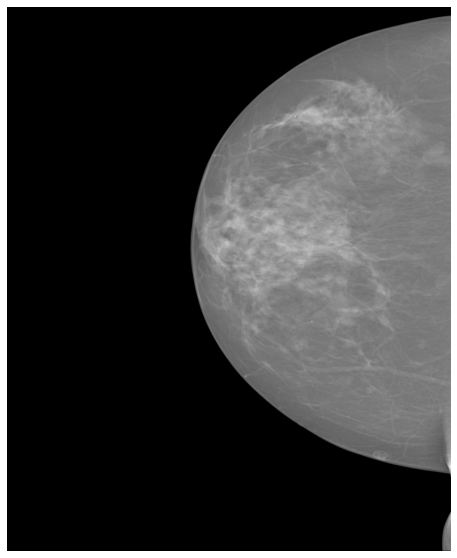

In [18]:
simple_im_show(montage(png_slices, grid_shape=(255, 208)))

In [261]:
png.shape

(4084, 3328)

In [21]:
rows_padding = stride*(png.shape[0]//stride + 1) - png.shape[0]
column_padding = stride*(png.shape[1]//stride + 1) - png.shape[1]
rows_padding

12

In [263]:
30*128

3840

In [265]:
32*128

4096

In [270]:
# pad the image on the upper side (not the body side) to obtain even tiling split
# split function
# reconstruct functio

In [22]:
def offset(input_length, window_size, stride):
    offset = (input_length) - (stride*((input_length - window_size)//stride)+window_size)
    return offset

In [23]:
padding_x = stride - offset(png.shape[0], stride, stride) + 1
padding_y = stride - offset(png.shape[0], stride, stride) + 1

In [25]:
padding_y

13